Привет! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

# Прогнозирование оттока клиентов. Оператор связи «Ниединогоразрыва.ком»

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Цель исследования
- провести исследовательский анализ данных
- обучить модель, которая будет прогнозировать отток клиентов оператора связи.
- составить отчет по проделанной работе

## Задача
- провести исследовательский анализ данных
- написать вывод
- написать вопросы
- написать план выполнения работы

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Добавь, пожалуйста, название проекта и цель исследования </div>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


In [2]:
def check_uniques(data):
    for i in data.columns:
        print(i)
        print(data[i].unique())
        print('---')

In [3]:
try:
    df_contract = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/phone.csv')
except:
    
    df_contract = pd.read_csv(
        '/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/datasets/final_provider/phone.csv')


<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично, данные на базе! </div>

## анализ df_contract

In [4]:
df_contract.head()

customerID  BeginDate              EndDate            Type  \
0  7590-VHVEG 2020-01-01                   No  Month-to-month   
1  5575-GNVDE 2017-04-01                   No        One year   
2  3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW 2016-05-01                   No        One year   
4  9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65

In [5]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


в данной таблице имеется 2 временных признака, 3 категориальных признака, и 2 непрерывных.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

In [6]:
check_uniques(df_contract)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
BeginDate
['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2017-11-01T

1. столбцы `BeginDate` и `EndDate` являются данными типа datetime, но записаны как object
    - поэтому загрузим df_conrtact изначально с изменением формата `BeginDate`
    - в столбце `EndDate` имеются значения "No", что не позволяет изменить тип данных
        - все зависит от того, как будет выглядеть решение задачи
        - если целевой признак `EndDate` и мы кодируем его в зависимости ушел пользователь или нет ([0,1]), тогда мы будем его кодировать
2. столбец `TotalCharges` имеет тип данных object, но содержит в себе только значения типа float, поэтому переведем его в нужный тип данных

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Ок, у нас стоит задача бинарной классификации(ушел пользователь или нет) </div>

### BeginDate

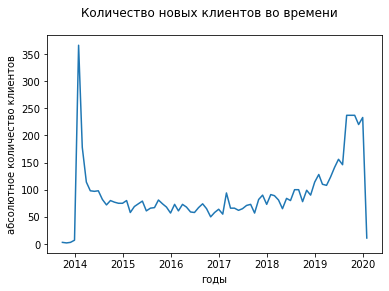

In [7]:
i = df_contract.groupby('BeginDate')['customerID'].count()

fig, ax = plt.subplots()

ax.plot(i.index, i)

fig.suptitle('Количество новых клиентов во времени')
plt.xlabel('годы')
plt.ylabel('абсолютное количество клиентов')
# plt.xticks(i.index)
plt.show()


странные пики в начале и в конце временного промежутка, наверное стоило бы отфильтровать их

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не стоит, в данном случае аномалий не будет, возможно это были разовые акции. Оставляй как есть </div>

не совсем уверен как лучше сделать, убрать именно эти выпадающие дни или взять промежуток времени, который находится между этими выпадающими значениями?

UPD:в итоге подумал, что стоит все же взять и провести сплит данных, а не фильтр тех выпадающих значений, то есть уменьшить окно временных данных.

непосредственно фильтр выполню это в конце тетради

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- понял, не выполню
</div>

### EndDate

In [8]:
print(f'''
{round(df_contract['EndDate'].where(lambda x: x == 'No').dropna().shape[0] / df_contract['EndDate'].shape[0] * 100)}% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных ({df_contract.shape[0]}), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?
''')



73% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных (7043), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?



<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Upsempling в данном случае не нужен, так как он не повлияет на roc-auc. Лучше используй весовые коэффициенты при кроссвалидации <a href = "https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/">Тык</a> </div>

<AxesSubplot:title={'center':'Количество ушедших клиентов во времени'}, xlabel='годы', ylabel='абсолютное количество клиентов'>

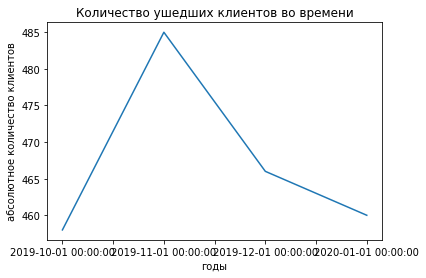

In [9]:
df_contract.query('EndDate != "No"').groupby('EndDate')['customerID'].count().plot(title='Количество ушедших клиентов во времени',
                                                                                   ylabel='абсолютное количество клиентов',
                                                                                   xlabel='годы')


первые ушедшие пользователи появились под конец 2019 года, степень отмены контрактов достигла максимума в октябре 2019 года, после чего видим снижение данного показателя

данный график кажется странным, так как учитывая то, что первые пользователи у данного оператора появились в 2014 году, а впервые пользователи начали уходить спустя почти 6 лет, выглядит сомнительно.

### TotalCharges

In [10]:
df_contract.query('TotalCharges == " "')


customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01      No  Two year              Yes   
753   3115-CZMZD 2020-02-01      No  Two year               No   
936   5709-LVOEQ 2020-02-01      No  Two year               No   
1082  4367-NUYAO 2020-02-01      No  Two year               No   
1340  1371-DWPAZ 2020-02-01      No  Two year               No   
3331  7644-OMVMY 2020-02-01      No  Two year               No   
3826  3213-VVOLG 2020-02-01      No  Two year               No   
4380  2520-SGTTA 2020-02-01      No  Two year               No   
5218  2923-ARZLG 2020-02-01      No  One year              Yes   
6670  4075-WKNIU 2020-02-01      No  Two year               No   
6754  2775-SEFEE 2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936                Mailed check           80.85               
1082               Mailed check           25.75               
1340    Credit card (automatic)           56.05               
3331               Mailed check           19.85               
3826               Mailed check           25.35               
4380               Mailed check           20.00               
5218               Mailed check           19.70               
6670               Mailed check           73.35               
6754  Bank transfer (automatic)           61.90

в целом не понятная система, если они оплатили сразу за два года, то почему у них нет параметра `TotalCharges`?

то есть контракт на два года, но оплата помесячная?
или предполагается, что мы сами посчитаем на 24 месяца?

In [11]:
print(
    f'''
    так как данные клиенты составляют лишь {round(df_contract.query('TotalCharges == " "').shape[0] / df_contract.shape[0] * 100, 2)}% от общего количества пользователей
    {round(df_contract.query('TotalCharges == " " and Type == "Two year"').shape[0] / df_contract.query('Type == "Two year"').shape[0], 2)}% от пользователей, которые подписали контракт сразу на два года
    {round(df_contract.query('TotalCharges == " " and PaperlessBilling == "No"').shape[0] / df_contract.query('PaperlessBilling == "No"').shape[0], 3)}% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    '''
)



    так как данные клиенты составляют лишь 0.16% от общего количества пользователей
    0.01% от пользователей, которые подписали контракт сразу на два года
    0.003% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    


In [12]:
df_contract = df_contract.query('TotalCharges != " "')

In [13]:
# и успешно меняем тип данных в столбце TotalCharges
# и честно сказать, я не понимаю, как такую конструкцию переделать так, чтобы он не ругался, что я записываю на копию
df_contract['TotalCharges'] = df_contract.loc[:,
                                              'TotalCharges'].astype('float')

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b>  Ты можешь заметить, что эти пропуски приходятся на дату выгрузки из бд (это новое подключение). Т.к. таких данных мало, можно их смело удалить или заменить значения на monthlycharges </div>

### Type

In [14]:
df_contract['Type'].value_counts(normalize=True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Type, dtype: float64

по параметру типа оплаты, клиенты распределены почти равномерно
- между ежемесячной оплатой и долгосрочной: 55% и 45% соответственно
- между долгосрочными, а то есть ежегодной и каждые 2 года: 21% и 24% соответственно

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: давай будем кодировать данные после объединения таблиц </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- понял
</div>

### PaperlessBilling

In [15]:
df_contract['PaperlessBilling'].value_counts(normalize=True)


Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64

наблюдается сдвиг в сторону бумажного счета

данный параметр можно трансформировать в формат [0,1], для меньшего потребления памяти, что ускорит вычисления

и в целом предполагаю, что необходимо будет произвести label encoding признаков

данный параметр остался с типом object, хотя содержит значения 0 и 1

изменим это

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Все преобразования идут во второй части проекта, на данном этапе идет только анализ и план работы </div>

### PaymentMethod

In [16]:
df_contract['PaymentMethod'].value_counts(normalize=True)


Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64

распределение класснов параметра `PaymentMethod`, так же, почти равномерно распределены, с небольшим сдвигом в сторону Electronic check

### MonthlyCharges

In [17]:
df_contract['MonthlyCharges'].describe()


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>
    
- средняя цена за месяц составляет 65
    - и скорее всего пик у 25 перетянул ее в меньшую сторону от медианы
- медианная цена за месяц составляет 70
- аномалий в данных не наблюдается
    - максимальные и минимальные значения выглядят реалистично.
        - около минимальных и максимальных значений достаточно клиентов с схожими ценами за месяц
</div>

<AxesSubplot:ylabel='Density'>

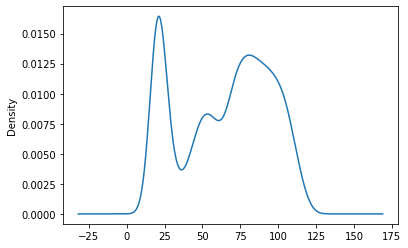

In [18]:
df_contract['MonthlyCharges'].plot(kind='kde')


наибольший пик наблюдается на стоимости 25 за месяц, второй пик на уровне 80 за месяц


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: хорошо, давай только добавим еще выводы по описательной статистике, раз ты ее используешь </div>

### TotalCharges

In [19]:
df_contract['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- медиана находится прямо на пике
- когда среднее значение сдвинулось в сторону больших значений, так как видим достаточное количество клиентов с большими общими чеками 
</div>

<AxesSubplot:ylabel='Density'>

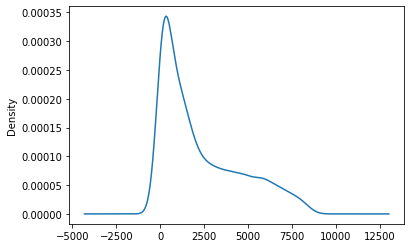

In [20]:
df_contract['TotalCharges'].plot(kind='kde')


основная масса клиентов потратила около 1300

## df_internet

In [21]:
df_internet.head()


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

In [22]:
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [23]:
df_internet.describe()


customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     6568-POCUI     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785

интересно, что около половины пользователей в каждой дополнительной услуге пользуется ею.

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Может все таки большая половина не пользуется?)
</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- большая половина не пользуется, но меньшая, как мне показалось, около половины, пользуется.
- в этом случае мне показалось интересным, что каждая дополнительная услуга пользуется спросом.
    - и нет большого дропа в клинетах
</div>

In [24]:
# у большинства признаков, наибольший класс чуть больше 50%
# значит второй класс находится около половины
df_internet.describe().iloc[3] / df_internet.describe().iloc[0] * 100

customerID           0.018126
InternetService     56.117455
OnlineSecurity      63.404024
OnlineBackup        55.972449
DeviceProtection    56.099329
TechSupport         62.950879
StreamingTV         50.933478
StreamingMovies     50.480334
dtype: object

In [25]:
check_uniques(df_internet)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
InternetService
['DSL' 'Fiber optic']
---
OnlineSecurity
['No' 'Yes']
---
OnlineBackup
['Yes' 'No']
---
DeviceProtection
['No' 'Yes']
---
TechSupport
['No' 'Yes']
---
StreamingTV
['No' 'Yes']
---
StreamingMovies
['No' 'Yes']
---


здесь так же можно каждый параметр кодировать OHE 

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Согласен! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: при кодирование OHE у тебя тут будет утечка данных. Попробуй использовать OHE из библиотеки sklearn, fit_transform на обучающей выборке, transform на тестовой. Самое лучшее при работе с признаками - использовать пайплайны. </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- хорошо, понял
</div>

In [26]:
df_internet.shape[0] / df_contract.shape[0] * 100


78.45563139931741

данная таблица содержит данные не для каждого клиента, здесь потеряно 22% клиентов,
что уже неприятная потеря. Возможно из за того, что данные услуги были добавлены в процессе развития компании?

и в теории можем попробовать все NaN заменить 0 и посмотреть какая метрика получится у модели

либо использовать библиотеку, где модель может принять данные с потерянными значениями

## df_personal

In [27]:
df_personal.head()


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [28]:
df_personal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [29]:
df_personal.describe(include='all')


customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
unique        7043      2            NaN       2          2
top     6568-POCUI   Male            NaN      No         No
freq             1   3555            NaN    3641       4933
mean           NaN    NaN       0.162147     NaN        NaN
std            NaN    NaN       0.368612     NaN        NaN
min            NaN    NaN       0.000000     NaN        NaN
25%            NaN    NaN       0.000000     NaN        NaN
50%            NaN    NaN       0.000000     NaN        NaN
75%            NaN    NaN       0.000000     NaN        NaN
max            NaN    NaN       1.000000     NaN        NaN

In [30]:
check_uniques(df_personal)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
gender
['Female' 'Male']
---
SeniorCitizen
[0 1]
---
Partner
['Yes' 'No']
---
Dependents
['No' 'Yes']
---


In [31]:
for i in df_personal.columns:
    display(df_personal[i].value_counts(normalize=True))

6568-POCUI    0.000142
6339-TBELP    0.000142
5186-EJEGL    0.000142
5882-CMAZQ    0.000142
3106-ULWFW    0.000142
                ...   
2041-JIJCI    0.000142
4700-UBQMV    0.000142
8314-DPQHL    0.000142
7602-MVRMB    0.000142
4741-WWJQZ    0.000142
Name: customerID, Length: 7043, dtype: float64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

почти все параметры распределены равномерно

помимо `Dependents` у которого сдвиг в сторону "No"
И `SeniorCitizen` у которого сдив в сторону более молодых клиентов

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так же не многие имеют иждивенцев, всего 30%
</div>

данные параметры все относятся к категориальным, помимо `customerID`, и их можно закодировать.

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- убираю, так как это выполняется в следующей части проекта
</div>

## df_phone

In [32]:
df_phone.head()


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

In [33]:
df_phone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [34]:
640 / 7000 * 100


9.142857142857142

- если в остальных таблицах было около 7000 пользователей, то здесь на 640 меньше (10%)
- услуга MultiLines выходила позже остальных, поэтому не всем предлагалось?
- тут зависит от того, какую библиотеку мы будем использовать для обучения модели, у некоторых есть возможность принять на вход данные с пропусками.

In [35]:
df_phone.describe(include='all')


customerID MultipleLines
count         6361          6361
unique        6361             2
top     6568-POCUI            No
freq             1          3390

In [36]:
check_uniques(df_phone)


customerID
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
---
MultipleLines
['No' 'Yes']
---


имеется только один параметр `MultiLines`
у которого только два значения: No и Yes
так же можем привести к формату [0,1]

данный параметр распределен равномерно

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Почему бы и тут не использовать OHE. Так же в данной части работы это не требуется</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- решил добавить немного разнообразия
</div>

## Объединение данных в общую структуру

In [37]:
df_all = df_contract.copy()


In [38]:
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')


In [39]:
i = df_all.drop(columns=['customerID', 'BeginDate', 'EndDate'])


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> У тебя почти 3 тысячи строк исчезли, проверь объединение таблиц </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- если этот комментарий относительно цифр которые были под заголовком UPD
- то это из за того, что я отфильтровал, как мне показалось, странные пики на графике
- фильтровал я обрезав временной отрезок так, чтобы эти пики не входили в него
- поэтому количество информации значительно изменилось
</div>

In [40]:
df_all.shape[0]

7032

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- вроде потерялось только около 10 клиентов
- которые попали на момент, когда данные экспортировали из системы
</div>

для того, чтобы проверить признаки на наличие проблемы мультиколлинеарности, нам необходимо вычесть VIF (Variance Inflation Factor)

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так как отключили все OHE, то данный код не сработает, поэтому сразу же отключу
</div>

так как у признака `MonthlyCharges` VIF больше 10, это обозначате, что в данных имеется проблема мультиколлинеарности

мы можем либо удалить данный признак, либо оставить

в случае, если целью нашего построения модели является получения рабочей модели, то мы можем и оставиь ее,
если же мы хотим после успешного обучения модели посмотреть какие параметры она связала (интерпретация модели), то нам необходимо удалить данный параметр

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Молодец, что знаешь про VIF! Так же можно посмотреть ковариационную матрицу. </div>

## Выводы
- все таблицы были просмотрены
- основные проблемы:
    - не соответствие типа данных
    - временные данные вызывают сомнения
        - данные время оформления контракта имеют два сильных пика
        - данные отмены контракта содержат данные только за конец 2019 года
    - имеется проблема мультиколлинеарности
    - потеря данных в двух таблицах:
        - df_internet -- 22% по отношению к df_contract
        - df_phone -- 9.1% по отношению к df_contract
- проведена кодировка данных

## UPD

фильтр данных

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Как я писал выше, аномали в данных нет, поэтому фильтровать ничего не надо </div>

проверим как данный фильтр повлиял на распределение классов

данный фильтр не сильно изменил распределение классов в признаках, как и на VIF

## Вопросы

- предполагается, что мы приводим столбец EndDate к формату [0,1]?
    - в данном случае предполагается задача классификации?
- предполагается, что мы будем использовать `Binary Cross-Entropy Loss` как фунцию потерь?
- какие ресурсы есть у компании, чтобы обучить и поддерживать модель?
    - для того, чтобы выбрать тип модели для обучения
- если имеет значение:
    - дополнительные услуги входят в стоимость указанную в признаке `MonthlyCharges`? или мы должны это дополнительно рассчитывать
    - что обозначает признак `MultipleLines`

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> 1. У нас задача бинарной классификации
<br>2. Главной метрикой у нас будет roc-auc
<br>3. Лучше всегда начинать с простых моделей
<br>4. Подготовка признаков на твое усмотрение, обозначения признаков я привел в слаке</div>

# План выполнения задачи по обучению моделей

1. Уточнение задачи
    - базовая метрика
    - в каком формате необходим итог
    - как будет производиться оценка модели
2. Предобработка данных
    - ~~нахождение и устранение аномалий данных~~
    - кодирование признаков
    - обработка VIF
    - возможно нормализация данных
3. Обучение модели
    - выбор библиотеки для выполнения поставленной задачи
    - формирование датасетов
    - Модель 1:
        - тестовое обучение
        - настройка гиперпараметров
    - Модель 2 (бустинговая):
        - тестовое обучение
        - настройка гиперпараметров
4. Проверка модели на тестовых данных
    - сравнение результатов с целевыми
    - при необходимости повторить предыдущий пункт
5. Сдача задания
    - отправление кода
    - оценка работы

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Подправь, пожалуйста, план. По заданию нужно будет сделать минимум 2 модели, включая бустинговую модель. Так же аномалий в данном случае нет</div>

<b>Итоговый комментарий ревьюера:
&#9989;</b> Отлично, критические замечания учтены. Теперь можно переходить к выполнению второй части работы. Удачи!

## Задача к части обучения моделей
- сформировать общий датафрейм
- закодировать признаки
- сформировать датасеты для обучения
    - обучающая
    - тестовая
- Модель 1:
    - обучение
    - настройка гиперпараметров
- Модель 2 (бустинг):
    - обучение
    - настройка гиперпараметров
- Выводы

In [41]:
seed = 120922

In [42]:
%conda install scikit-learn=1.1.2
%conda install -c conda-forge imbalanced-learn
!pip install optuna  #Код ревьюера

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
  Using cached scipy-1.8.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1


In [43]:
from tqdm import tqdm

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import r_regression, f_classif

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectKBest
from sklearn.utils import shuffle

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
import optuna

from imblearn.under_sampling import AllKNN
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE
from imblearn.combine import SMOTETomek

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from catboost import Pool
from catboost import CatBoostClassifier
from catboost import cv

import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Если ты используешь сторонние библиотеки, пожалуйста, предусматривай их установку </div>

In [44]:
# def upsample(features, target, repeat, type):
#     features_zeros = features[target == 0]
#     features_ones = features[target == 1]
#     target_zeros = target[target == 0]
#     target_ones = target[target == 1]
#     if type:
#         features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
#         target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
#     else:
#         features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
#         target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])

#     features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=seed)
#     return features_upsampled, target_upsampled

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Дисбаланс классов не повлияет на roc auc, а из-за дубликатов, которые делаются в этой функции, появляются утечки на кросс-валидации и метрика недостоверна. </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- я по итогу не использую этот код
- поэтому выключу его совсем
</div>

In [45]:
def encode(train, target):
    encoder = OrdinalEncoder()
    nonulls = np.array(train.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    train.loc[train.notnull()] = np.squeeze(impute_ordinal)

    nonulls = np.array(target.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.transform(impute_reshape)
    target.loc[target.notnull()] = np.squeeze(impute_ordinal)
    return train, target

In [46]:
def all_merge(data):
    """
    объединяет все датафреймы в один
    """
    df = data[0].copy()
    for i in data[1:]:
        df = df.merge(i, on='customerID', how='left')
    df.drop(columns=['customerID'], inplace=True)
    return df

In [47]:
def manual_preproc(data, categorical_features, numerical_features):
    df = all_merge(data)
    
    # сразу уберем тех пользователей, которые попали на время экспорта данных
    df = df.query('TotalCharges != " "')
    df['TotalCharges'] = df['TotalCharges'].astype('float')
    
    # выносим целевой признак
    target = df['EndDate'].copy()
    df.drop(columns=['EndDate'], inplace=True)

    features_train, features_test, target_train, target_test = train_test_split(df, 
                                                                                target,
                                                                                test_size=0.25,
                                                                                stratify=target,
                                                                                random_state=seed)
    # так как пользователи не пользовались данными услугами, то мы сначала заполним пропуски нулями,
    # чтобы в процессе энкодинга это учитывался как класс
    features_train.fillna('No', inplace=True)
    features_test.fillna('No', inplace=True)
    # обработка целевого признака
    target_train.loc[target_train != "No"] = 1
    target_train.loc[target_train == "No"] = 0
    target_train = target_train.astype('int')
    
    target_test.loc[target_test != "No"] = 1
    target_test.loc[target_test == "No"] = 0
    target_test = target_test.astype('int')

    #categorical features
    # ohe
    for columns in categorical_features:
        encode(features_train[columns], features_test[columns])
    
    #knn
    #imputer = KNNImputer()
    #features_train = pd.DataFrame(np.round(imputer.fit_transform(features_train)), columns = features_train.columns)
    #features_test = pd.DataFrame(np.round(imputer.transform(features_test)), columns = features_test.columns)
    for columns in categorical_features:  # catboost ругается на float
        features_train[columns] = features_train[columns].astype('int')
        features_test[columns] = features_test[columns].astype('int')
    
    #numerical features
    for split in [features_train, features_test]:
        split['BeginDate'] = pd.to_numeric(split['BeginDate'])
        split['BeginDate/MonthlyCharges'] =  split['BeginDate'] / split['MonthlyCharges']
        split['BeginDate*MonthlyCharges/TotalCharges'] = (split['BeginDate'] * split['MonthlyCharges']) / split['TotalCharges']
        split['BeginDate_log'] = np.log(split['BeginDate'])
        
    
    transformer = StandardScaler()
    features_train[numerical_features] = transformer.fit_transform(features_train[numerical_features])
    features_test[numerical_features] = transformer.transform(features_test[numerical_features])

    return features_train, features_test, target_train, target_test

In [48]:
def mentrics_eval(estimator=None, features=None, target=None, predictions=None, base=0, matrix=0, roc=0, proba=0):
    if estimator:
        predictions = estimator.predict(features)
    if base:
        # некоторые модели предсказывают вероятности, поэтому чтобы автоматизировать всегда будет менять здесь на [0,1]
        print(f'''roc_auc of predictions:       {roc_auc_score(target, [1 if i >=0.5 else 0 for i in predictions])}
accuracy_test of predictions: {accuracy_score(target, [1 if i >=0.5 else 0 for i in predictions])}''')
    if matrix:
        ConfusionMatrixDisplay.from_predictions(target, [1 if i >=0.5 else 0 for i in predictions])
    if roc:
        RocCurveDisplay.from_predictions(target, [1 if i >=0.5 else 0 for i in predictions])
    if proba:
        if estimator:
            try:
                probabilities = estimator.predict(features)[:,1]
            except:
                probabilities = estimator.predict_proba(features)[:,1]
        else:
            probabilities = predictions
        print(RocCurveDisplay.from_predictions(target, probabilities))


In [49]:
def vif_metric(data):
    return pd.Series(
                np.linalg.inv(data.corr().to_numpy()).diagonal(),
                index=data.columns, 
                name='VIF')

In [50]:
def treshhold(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [51]:
try:
    df_contract = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/phone.csv')
except:
    
    df_contract = pd.read_csv(
        '/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/datasets/final_provider/phone.csv')

## Базовые модели

### Предобработка

#### Формируем общий датафрейм

In [52]:
# так как данные о клиентах будет мешаться
# уберем

# объеденим все признаки вместе
df_all = df_contract.copy()
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')
# сразу уберем тех пользователей, которые попали на время экспорта данных
df_all = df_all.query('TotalCharges != " "')
df_all['TotalCharges'] = df_all['TotalCharges'].astype('float')
df_all.drop(columns=['customerID'], inplace=True)

In [53]:
# изменим целевой признак сразу же
df_all.loc[df_all['EndDate'] != "No", 'EndDate'] = 1
df_all.loc[df_all['EndDate'] == "No", 'EndDate'] = 0
df_all['EndDate'] = df_all['EndDate'].astype('int')

In [54]:
# так как пропущенные значения находятся только в таблице df_internet
# которая содержит информацию о доп услугах, то заменим все пропуски No
df_all.fillna('No', inplace=True)

In [55]:
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines']

numeric_features = ['TotalCharges', 'BeginDate_log', 'BeginDate/MonthlyCharges',
                    'BeginDate*MonthlyCharges/TotalCharges']

<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично, выборка сформирована</div>

In [56]:
df_all

BeginDate  EndDate            Type PaperlessBilling  \
0    2020-01-01        0  Month-to-month              Yes   
1    2017-04-01        0        One year               No   
2    2019-10-01        1  Month-to-month              Yes   
3    2016-05-01        0        One year               No   
4    2019-09-01        1  Month-to-month              Yes   
...         ...      ...             ...              ...   
7038 2018-02-01        0        One year              Yes   
7039 2014-02-01        0        One year              Yes   
7040 2019-03-01        0  Month-to-month              Yes   
7041 2019-07-01        1  Month-to-month              Yes   
7042 2014-08-01        0        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges InternetService  \
0              Electronic check           29.85         29.85             DSL   
1                  Mailed check           56.95       1889.50             DSL   
2                  Mailed check           53.85        108.15             DSL   
3     Bank transfer (automatic)           42.30       1840.75             DSL   
4              Electronic check           70.70        151.65     Fiber optic   
...                         ...             ...           ...             ...   
7038               Mailed check           84.80       1990.50             DSL   
7039    Credit card (automatic)          103.20       7362.90     Fiber optic   
7040           Electronic check           29.60        346.45             DSL   
7041               Mailed check           74.40        306.60     Fiber optic   
7042  Bank transfer (automatic)          105.65       6844.50     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies  gender  SeniorCitizen Partner Dependents MultipleLines  
0                 No  Female              0     Yes         No            No  
1                 No    Male              0      No         No            No  
2                 No    Male              0      No         No            No  
3                 No    Male              0      No         No            No  
4                 No  Female              0      No         No            No  
...              ...     ...            ...     ...        ...           ...  
7038             Yes    Male              0     Yes        Yes           Yes  
7039             Yes  Female              0     Yes        Yes           Yes  
7040              No  Female              0     Yes        Yes            No  
7041              No    Male              1     Yes         No           Yes  
7042             Yes    Male              0      No         No            No  

[7032 rows x 19 columns]

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b>Отлично!</div>

#### Визуализация

In [57]:
# так как чтобы провести визуализацию, нужно все закодировать
features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
                                                                            categorical_features, 
                                                                            numeric_features,)

/tmp/ipykernel_944/4203758287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [58]:
# добавляем EndDate чтобы использовать параметр hue в графиках
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'EndDate']

numeric_features = ['TotalCharges', 'BeginDate_log', 'BeginDate/MonthlyCharges',
                    'BeginDate*MonthlyCharges/TotalCharges', 'EndDate']

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Вылетает ошибка, categorical_features не объявлена. Пожалуйста, проверяй работоспособность кода на ошибки.</div>

In [59]:
# посмотрим на мультиколлинеарность
vif_metric(features_train)

BeginDate                                6392.190264
Type                                        2.491213
PaperlessBilling                            1.202064
PaymentMethod                               1.186740
MonthlyCharges                             58.362916
TotalCharges                               16.146529
InternetService                             8.094819
OnlineSecurity                              1.525606
OnlineBackup                                1.589752
DeviceProtection                            1.638182
TechSupport                                 1.609923
StreamingTV                                 2.169785
StreamingMovies                             2.147784
gender                                      1.003255
SeniorCitizen                               1.147577
Partner                                     1.465045
Dependents                                  1.371037
MultipleLines                               1.545784
BeginDate/MonthlyCharges                   44.

In [60]:
# из за того, что были добавлены дополнительные признаки
# появилась проблема мультиколлинеарности
for split in [features_train, features_test]:
    split.drop(columns=['MonthlyCharges'], inplace=True)
    split.drop(columns=['BeginDate'], inplace=True)

In [61]:
vif_metric(features_train)

Type                                     2.411544
PaperlessBilling                         1.201301
PaymentMethod                            1.186224
TotalCharges                             8.933889
InternetService                          2.241998
OnlineSecurity                           1.471206
OnlineBackup                             1.511745
DeviceProtection                         1.564168
TechSupport                              1.547762
StreamingTV                              1.742131
StreamingMovies                          1.757178
gender                                   1.003136
SeniorCitizen                            1.146190
Partner                                  1.464204
Dependents                               1.369497
MultipleLines                            1.526546
BeginDate/MonthlyCharges                 3.992329
BeginDate*MonthlyCharges/TotalCharges    1.584726
BeginDate_log                            7.239182
Name: VIF, dtype: float64

проблему мультиколлинеарности решили

<div class="alert alert-success">
<b>Комментарий ревьюера V3:
&#9989;</b>Отлично!</div>

In [62]:
# немного не понимаю разницы между корреляцией и виф
# виф же показывает линейную зависимость между параметрами

# объеденям все обратно в общий дф
j = pd.concat([features_train,features_test])
k = pd.concat([target_test,target_train])
i = pd.concat([j, k], axis=1)

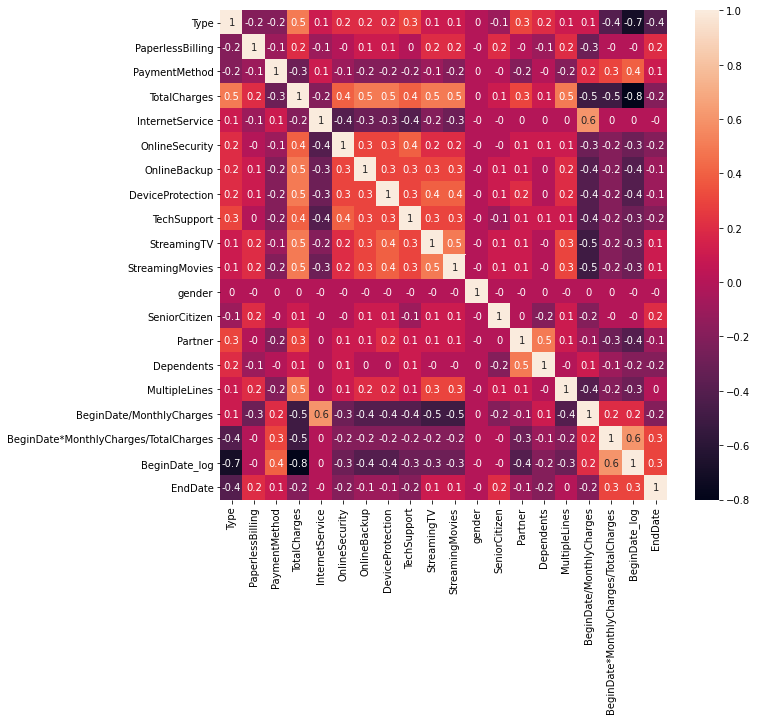

In [63]:
fig, ax = plt.subplots(figsize=(10,9))
ax = sns.heatmap(round(i.corr(),1), annot=True)

сильные корреляции в основном находятся между непрерывными параметрами

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b> Может "непрерывными"?).</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 3:</b>

- поправил
</div>

In [64]:
# если рассматривать корреляцию признаков с целевым признаком
# то здесь нет каких либо сильных или средней силы корреляций
pd.DataFrame(r_regression(features_train, target_train), index=features_train.columns)

0
Type                                  -0.399433
PaperlessBilling                       0.192629
PaymentMethod                          0.113499
TotalCharges                          -0.205529
InternetService                       -0.048933
OnlineSecurity                        -0.172814
OnlineBackup                          -0.087443
DeviceProtection                      -0.070634
TechSupport                           -0.165385
StreamingTV                            0.062225
StreamingMovies                        0.049107
gender                                 0.003466
SeniorCitizen                          0.148374
Partner                               -0.158872
Dependents                            -0.160550
MultipleLines                          0.037422
BeginDate/MonthlyCharges              -0.194595
BeginDate*MonthlyCharges/TotalCharges  0.324131
BeginDate_log                          0.316742

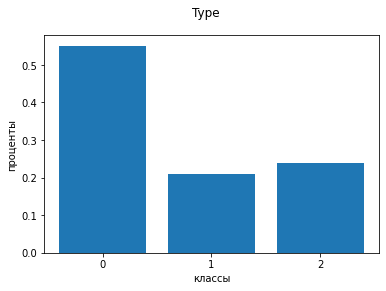

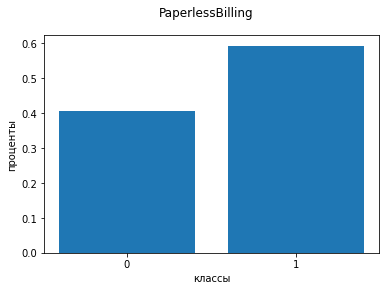

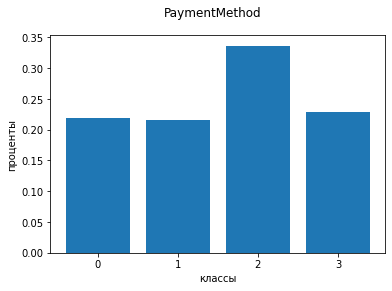

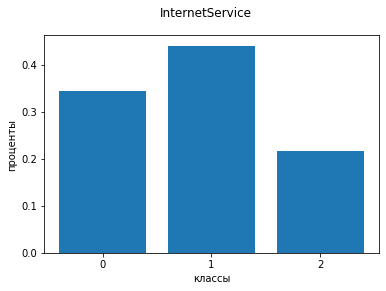

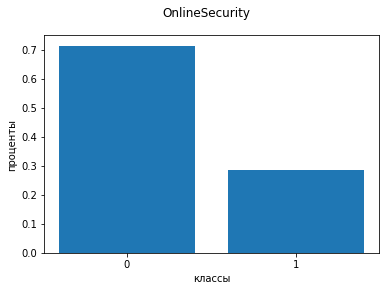

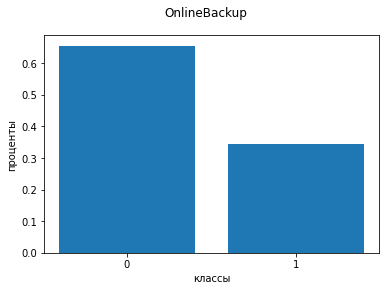

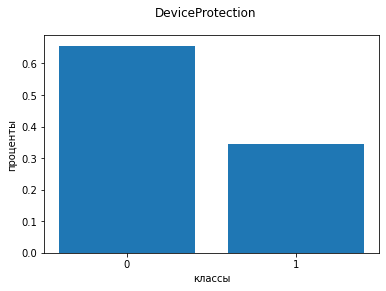

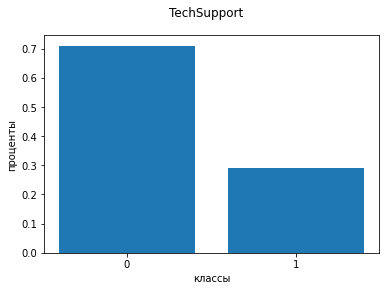

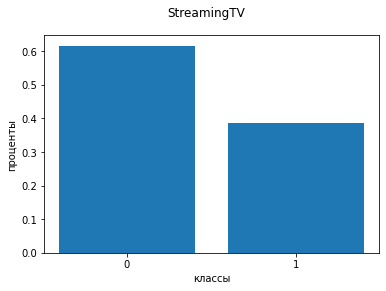

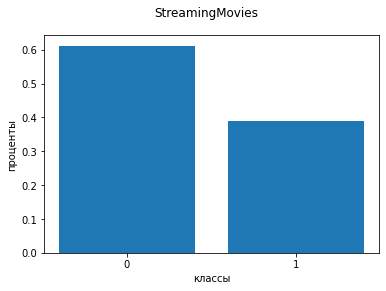

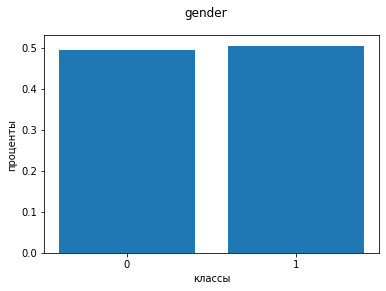

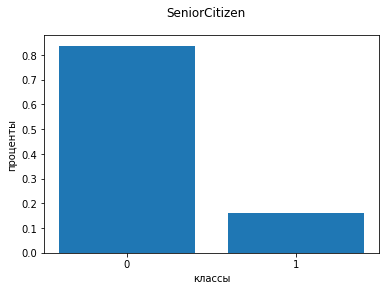

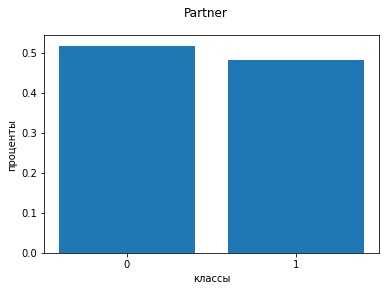

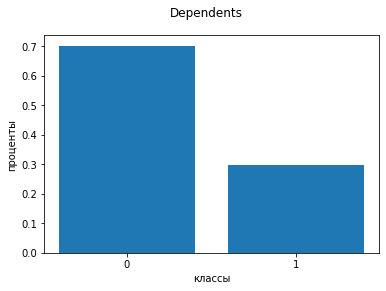

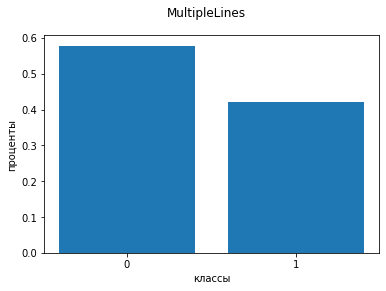

In [65]:
# сами классы между собой
for feature in range(len(categorical_features)-1):
    fig, ax = plt.subplots()
    y=i[categorical_features[feature]].value_counts(normalize=True)
    x=y.index
    ax.bar(x,y)
    plt.xticks(x)
    fig.suptitle(f'{categorical_features[feature]}')
    plt.xlabel('классы')
    plt.ylabel('проценты')
    plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b> Тут ничего не разберешь, может лучше циклом пройтись?Для категориальных признаков лучше использовать barplot</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 3:</b>

- в основном видим дисбаланс классов у категориальных данных
- только gender и partner распределены равномерно
</div>

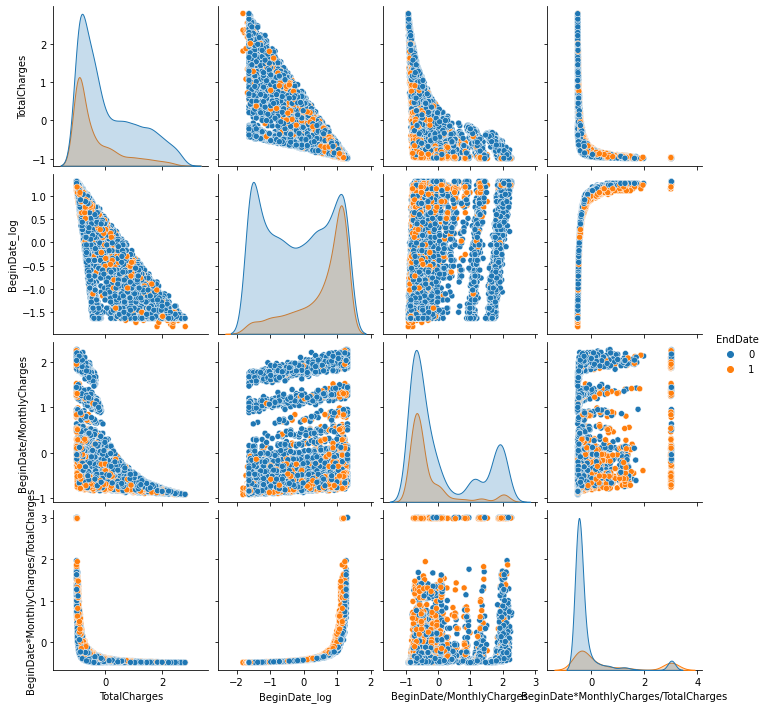

In [66]:
# берем 

sns.pairplot(i[numeric_features], hue="EndDate")

на графиках заметно, что некоторые добавленные переменные имеют чуть больше разгранечение в целевом признаке

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b>В данной части работы необходимо провести корреляционный анализ признаков, визуализацию распределений и проверку данных на мультиколлинеарность перед построением моделей.  </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b>Ничего не понял, про какое разграничение речь идет. Переформулируй, пожалуйста  </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 3:</b>

- на большинстве графиков можно заметить тенденцию распределения ушедших клиентов
    - например на графике BeginDate/MonthlyCharges с TotalCharges ушедшие клиенты больше располагаются у начала осей x и y
    - у графика BeginDate/MonthlyCharges с BeginDate_log данные клиенты больше располагаются к верхнему левому углу
- но, например,у графика BeginDate_log с TotalCharges нет никаких паттернов распределения
</div>

### Базовая метрика

In [68]:
# убираем EndDate из признаков
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines']

numeric_features = ['TotalCharges', 'BeginDate_log', 'BeginDate/MonthlyCharges',
                    'BeginDate*MonthlyCharges/TotalCharges']

In [69]:
features_train, features_test, target_train, target_test = train_test_split(df_all.drop(columns=['EndDate']), 
                                                                            df_all['EndDate'],
                                                                            test_size=0.25,
                                                                            stratify=df_all['EndDate'],
                                                                            random_state=seed)

In [70]:
for split in [features_train, features_test]:
        split['BeginDate'] = pd.to_numeric(split['BeginDate'])
        split['BeginDate/MonthlyCharges'] =  split['BeginDate'] / split['MonthlyCharges']
        split['BeginDate*MonthlyCharges/TotalCharges'] = (split['BeginDate'] * split['MonthlyCharges']) / split['TotalCharges']
        split['BeginDate_log'] = np.log(split['BeginDate'])

In [71]:
# по идее DummyClassifier предиктил бы наиболее часто встречающийся класс
target_test.value_counts(normalize=True)

0    0.734357
1    0.265643
Name: EndDate, dtype: float64

In [72]:
# вычислим базовую метрику для DummyClassifier
more_frequent = target_test.value_counts(normalize=True).index[0]
roc_auc_score(target_test, [more_frequent] * target_test.shape[0])

0.5

<div class="alert alert-success">
<b>Комментарий ревьюера V3:
&#9989;</b>Отлично!</div>

### Формируем pipline

In [73]:
numeric_transformer = Pipeline(steps=[
        ('standard', StandardScaler())
])

In [74]:
categorical_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(drop='first',
                                sparse=False))

])

In [75]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
])

In [76]:
# словарь для сбора моделей и лучших метрик
basic_models = {'models': {
                            'tree': [],
                            'forest': [],
                            'logistic': []
                },
                'metrics': {
                            'tree': [],
                            'forest': [],
                            'logistic': []
                }}

### Дерево

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b>Здесь и далее: не надо тестировать все модели, тестировать нужно только лучшую. Исправь, пожалуйста, так же лишние значения тестирования удали в выводах  </div>

In [77]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('classificator',DecisionTreeClassifier(random_state=seed))
           ])

In [78]:
tree_results = cross_val_score(pipeline, features_train, target_train, cv=10, scoring='roc_auc', verbose=1)
tree_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


array([0.82058174, 0.84189985, 0.82261257, 0.81969872, 0.81291067,
       0.83760613, 0.79801587, 0.85052602, 0.82818383, 0.80379291])

#### Пробуем подбирать параметры

In [79]:
tree_param = {
    'tree__criterion': ['gini'],
    'tree__max_depth': range(2,15,5),
    'tree__min_samples_split': range(2,10,2),
    'tree__class_weight': ['balanced'],
}

pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('tree', DecisionTreeClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=tree_param,
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [80]:
grid.fit(features_train, target_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=4; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=4; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['Type',
                                                                          'Pap...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'tree__class_weight': ['balanced'],
                         'tree__criterion': ['gini'],
                         'tree__max_depth': range(2, 15, 5),
                         'tree__min_samples_split': range(2, 10, 2)},
             scoring='roc_auc', verbose=2)

In [81]:
basic_models.get('models').get('tree').append(grid.best_estimator_)
basic_models.get('metrics').get('tree').append(grid.best_score_)

In [82]:
#  mentrics_eval(grid_tree, features_test, target_test,None,1,1,1,1)

использование парамера clss_weight: 'balanced', добавляет к метрике 0.05

модель в основном сильно ошибается с классом, которого мало, то есть с теми, кто расторгнул договор, даже при том, что весы были настроены

в основном у всех общая площадь по AUC будет у всех примерно одинаковая, 

<div class="alert alert-success">
<b>Комментарий ревьюера V3:
&#9989;</b>Отлично!</div>

#### Попробуем использовать стратификацию

In [83]:
tree_param = {
    'tree__criterion': ['gini'],
    'tree__max_depth': range(5,20,5),
    'tree__min_samples_split': range(2,10,2),
    'tree__class_weight': ['balanced'],
}

In [84]:
skf = StratifiedKFold(5, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('tree', DecisionTreeClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=tree_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [85]:
grid.fit(features_train, target_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encode...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'tree__class_weight': ['balanced'],
                         'tree__criterion': ['gini'],
                         'tree__max_depth': range(5, 20, 5),
                         'tree__min_samples_split': range(2, 10, 2)},
             scoring='roc_auc', verbose=2)

In [86]:
grid.best_params_

{'tree__class_weight': 'balanced',
 'tree__criterion': 'gini',
 'tree__max_depth': 10,
 'tree__min_samples_split': 8}

In [87]:
basic_models.get('models').get('tree').append(grid.best_estimator_)
basic_models.get('metrics').get('tree').append(grid.best_score_)

In [88]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

интересно, что стратифицированная кросс валидация, хоть и улучшает нахождение истино отрицательных вариантов, но ситуация с ложно положительными вариантами усугубляется

#### Эксперимент оптимизации признаков

In [89]:
tree_param = {
    'tree__criterion': ['gini'],
    'tree__max_depth': range(5,20,5),
    'tree__min_samples_split': range(2,10,2),
    'tree__class_weight': ['balanced'],
}

In [90]:
skf = StratifiedKFold(5, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                    ('preprocessor', preprocessor),
                                    ('selector', GenericUnivariateSelect(score_func=mutual_info_classif, 
                                                                            mode='k_best', 
                                                                            param=6)),
                                    ('tree', DecisionTreeClassifier(random_state=seed)),
                                ])

grid = GridSearchCV(pipeline,
                        param_grid=tree_param,
                        cv=skf,
                        verbose=2,
                        n_jobs=-1,
                        scoring='roc_auc')
    
grid.fit(features_train, target_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.4s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.3s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.3s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.3s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.3s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.3s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.3s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encode...
                                       ('selector',
                                        GenericUnivariateSelect(mode='k_best',
                                                                param=6,
                                                                score_func=<function mutual_info_classif at 0x7f0a750a2160>)),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'tree__class_weight': ['balanced'],
                         'tree__criterion': ['gini'],
                         'tree__max_depth': range(5, 20, 5),
                         'tree__min_samples_split': range(2, 10, 2)},
             scoring='roc_auc', verbose=2)

In [91]:
basic_models.get('models').get('tree').append(grid.best_estimator_)
basic_models.get('metrics').get('tree').append(grid.best_score_)

In [92]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

значительно ничего не изменилось

слегка улучшилась ситуация с истынными, но ситуация с ложными ухудшилась относительно варианта с стратификацией

<div class="alert alert-success">
<b>Комментарий ревьюера V3:
&#9989;</b>Хорошо</div>

### Форест

#### Простая проверка

In [93]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('classificator',RandomForestClassifier())
           ])

In [94]:
tree_results = cross_val_score(pipeline, features_train, target_train, cv=10, scoring='roc_auc', verbose=1)
tree_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished


array([0.90639728, 0.90024853, 0.91241043, 0.92062052, 0.89414913,
       0.90451274, 0.89780362, 0.89476744, 0.90469731, 0.85613695])

#### Подбираем параметры

In [95]:
forest_param = {
    'forest__criterion': ['gini'],
    'forest__n_estimators': range(100,500,100),
    'forest__max_depth': range(2,20,5),
    'forest__class_weight': ['balanced'],
}

In [96]:
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('forest', RandomForestClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=forest_param,
                    cv=3,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [97]:
grid.fit(features_train, target_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.2s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.2s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.2s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.4s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.4s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.4s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=300; total time=   0.6s
[CV] END forest__class_weight

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['Type',
                                                                          'Pap...
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('forest',
                                        RandomForestClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'forest__class_weight': ['balanced'],
                         'forest__criterion': ['gini'],
                         'forest__max_depth': range(2, 20, 5),
                         'forest__n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=2)

In [98]:
grid.best_params_

{'forest__class_weight': 'balanced',
 'forest__criterion': 'gini',
 'forest__max_depth': 17,
 'forest__n_estimators': 400}

In [99]:
basic_models.get('models').get('forest').append(grid.best_estimator_)
basic_models.get('metrics').get('forest').append(grid.best_score_)

In [100]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

лес чуть больше разделяет истино отрицательные случаи, но с остальными вариантами ситуация сильно не меняется

по отношению к дереву, у леса общая площадь AUC чуть больше

#### Стратификация

In [101]:
skf = StratifiedKFold(3, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('forest', RandomForestClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=forest_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [102]:
grid.fit(features_train, target_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.2s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.2s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.2s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.4s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.4s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.4s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=300; total time=   0.5s
[CV] END forest__class_weight

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encode...
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('forest',
                                        RandomForestClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'forest__class_weight': ['balanced'],
                         'forest__criterion': ['gini'],
                         'forest__max_depth': range(2, 20, 5),
                         'forest__n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=2)

In [103]:
grid.best_score_

0.8940619990310187

In [104]:
grid.best_params_

{'forest__class_weight': 'balanced',
 'forest__criterion': 'gini',
 'forest__max_depth': 17,
 'forest__n_estimators': 400}

In [105]:
basic_models.get('models').get('forest').append(grid.best_estimator_)
basic_models.get('metrics').get('forest').append(grid.best_score_)

In [106]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,None,1,1,1,1)

так же не много изменилось в метрике и ситуации

#### Тест оптимизации признаков

In [107]:
skf = StratifiedKFold(3, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('selector', GenericUnivariateSelect(score_func=mutual_info_classif, 
                                                                        mode='k_best', 
                                                                        param=6)),
                                ('forest', RandomForestClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=forest_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [108]:
grid.fit(features_train, target_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.5s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.5s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.5s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=200; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=300; total time=   0.8s
[CV] END forest__class_weight

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encode...
                                        GenericUnivariateSelect(mode='k_best',
                                                                param=6,
                                                                score_func=<function mutual_info_classif at 0x7f0a750a2160>)),
                                       ('forest',
                                        RandomForestClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'forest__class_weight': ['balanced'],
                         'forest__criterion': ['gini'],
                         'forest__max_depth': range(2, 20, 5),
                         'forest__n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=2)

In [109]:
grid.best_params_

{'forest__class_weight': 'balanced',
 'forest__criterion': 'gini',
 'forest__max_depth': 17,
 'forest__n_estimators': 300}

In [110]:
basic_models.get('models').get('forest').append(grid.best_estimator_)
basic_models.get('metrics').get('forest').append(grid.best_score_)

In [111]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,None,1,1,1,1)

уменьшения количества признаков и выбор только наиболее значимых не привел к значимому улучшению метрики.

### Логистическая классификация

#### Простая проверка

In [112]:
pipeline = Pipeline(steps = [
                     ('preprocessor', preprocessor),
                     ('logistic', LogisticRegression(random_state=seed))
           ])

In [113]:
logistic_results = cross_val_score(pipeline, features_train, target_train, cv=3, scoring='roc_auc', verbose=1)
logistic_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished


array([0.8690307 , 0.84501333, 0.85688896])

#### Подбираем параметры

In [114]:
log_param = {
    'logistic__C': np.arange(0.1,1.1,0.1),
    'logistic__class_weight': ['balanced'],
    'logistic__solver': ['liblinear'],
}

In [115]:
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('logistic', LogisticRegression(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=log_param,
                    cv=3,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [116]:
grid.fit(features_train, target_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.30000000000000004, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.30000000000000004, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.30000000000000004, logistic__class_w

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['Type',
                                                                          'Pap...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=120922))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'logistic__class_weight': ['balanced'],
                         'logistic__solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

In [117]:
grid.best_params_

{'logistic__C': 1.0,
 'logistic__class_weight': 'balanced',
 'logistic__solver': 'liblinear'}

In [118]:
basic_models.get('models').get('logistic').append(grid.best_estimator_)
basic_models.get('metrics').get('logistic').append(grid.best_score_)

In [119]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,None,1,1,1,1)

из за того, что в логистической регрессии не были настроены весы для классов, то уровень срабатывания не совсем оптимальный
но даннай картина позволяет нам предположить, что скорее всего при использовании нескольких логистических регрессий, которые мы в последующем соединим, может привести к увеличению метрики

upd:

хотя уже не уверен, возможно основная проблема находится в данных, но я плохо уже представляю, что можно применить, чтобы хоть как то сдвинуть дальше метрику

#### Стратификация

In [120]:
skf = StratifiedKFold(3, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('logistic', LogisticRegression(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=log_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [121]:
grid.fit(features_train, target_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.30000000000000004, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.30000000000000004, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.30000000000000004, logistic__class_w

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encode...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=120922))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'logistic__class_weight': ['balanced'],
                         'logistic__solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

In [122]:
grid.best_params_

{'logistic__C': 1.0,
 'logistic__class_weight': 'balanced',
 'logistic__solver': 'liblinear'}

In [123]:
basic_models.get('models').get('logistic').append(grid.best_estimator_)
basic_models.get('metrics').get('logistic').append(grid.best_score_)

In [124]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,None,1,1,1,1)

#### Тест оптимизации признаков

In [125]:
skf = StratifiedKFold(3, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                    ('preprocessor', preprocessor),
                                    ('selector', GenericUnivariateSelect(score_func=mutual_info_classif, 
                                                                            mode='k_best', 
                                                                            param=6)),
                                    ('logistic', LogisticRegression(random_state=seed)),
                                ])

grid = GridSearchCV(pipeline,
                        param_grid=log_param,
                        cv=skf,
                        verbose=2,
                        n_jobs=-1,
                        scoring='roc_auc')
grid.fit(features_train, target_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.3s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.4s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.4s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.30000000000000004, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.30000000000000004, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.4s
[CV] END logistic__C=0.30000000000000004, logistic__class_w

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'BeginDate_log',
                                                                          'BeginDate/MonthlyCharges',
                                                                          'BeginDate*MonthlyCharges/TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encode...
                                       ('selector',
                                        GenericUnivariateSelect(mode='k_best',
                                                                param=6,
                                                                score_func=<function mutual_info_classif at 0x7f0a750a2160>)),
                                       ('logistic',
                                        LogisticRegression(random_state=120922))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'logistic__class_weight': ['balanced'],
                         'logistic__solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

In [126]:
basic_models.get('models').get('logistic').append(grid.best_estimator_)
basic_models.get('metrics').get('logistic').append(grid.best_score_)

In [127]:
#  mentrics_eval(grid.best_estimator_, features_test, target_test,None,1,1,1,1)

в целом всес похоже как между самими регрессиями, так и между предыдущими моделями

## Manual preproccesing

In [128]:
# грубо
(7000 - 5000) / 7000

0.2857142857142857

так как датасет обладал достаточным количеством пропущенных значений, около 20%, что значительно влияет на последующее обучение, необходимо было использовать какие либо методы заполнения пропущенных значений

KNN считается достаточно продвинутым, поэтому он и использовался

и другие методы нам не доступны: например уточнить у соответствующего отдела (запросить данные), либо еще какие нибудь взаимодействия с иточником, что было бы идеальным решением

другие методики слабо подходят, так как у нас большое количество пропущенных данных

с одной стороны можно было использовать классы для sklearn чтобы использовать пайплайн, но изначально сделал этот раздел используя нативные инструменты

изначально не было понимания того, как добавить KNN в пайплайн, и до этого проекта была попытка использовать его руками, то предыдущая часть проекта не содержала эксперименты с использованием KNN

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b>В данном случае пропуски в данных всего лишь указывают, что клиент этой услугой не пользовался, поэтому KNN тут лишний  </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- исправил
- теперь заполняю пропуски значением "No"
    - так как пропуски только в df с дополнительными услугами
- после чего выполняю кодировку данных
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично!</div>

### Подготовка данных

In [129]:
features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_944/4203758287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [130]:
vif_metric(features_train)

BeginDate                                6392.190264
Type                                        2.491213
PaperlessBilling                            1.202064
PaymentMethod                               1.186740
MonthlyCharges                             58.362916
TotalCharges                               16.146529
InternetService                             8.094819
OnlineSecurity                              1.525606
OnlineBackup                                1.589752
DeviceProtection                            1.638182
TechSupport                                 1.609923
StreamingTV                                 2.169785
StreamingMovies                             2.147784
gender                                      1.003255
SeniorCitizen                               1.147577
Partner                                     1.465045
Dependents                                  1.371037
MultipleLines                               1.545784
BeginDate/MonthlyCharges                   44.

In [131]:
# из за того, что были добавлены дополнительные признаки
# появилась проблема мультиколлинеарности
for split in [features_train, features_test]:
    split.drop(columns=['MonthlyCharges'], inplace=True)
    split.drop(columns=['BeginDate'], inplace=True)

In [132]:
vif_metric(features_train)

Type                                     2.411544
PaperlessBilling                         1.201301
PaymentMethod                            1.186224
TotalCharges                             8.933889
InternetService                          2.241998
OnlineSecurity                           1.471206
OnlineBackup                             1.511745
DeviceProtection                         1.564168
TechSupport                              1.547762
StreamingTV                              1.742131
StreamingMovies                          1.757178
gender                                   1.003136
SeniorCitizen                            1.146190
Partner                                  1.464204
Dependents                               1.369497
MultipleLines                            1.526546
BeginDate/MonthlyCharges                 3.992329
BeginDate*MonthlyCharges/TotalCharges    1.584726
BeginDate_log                            7.239182
Name: VIF, dtype: float64

### Catboost

In [133]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

In [134]:
# первичный тест CatBoost
CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        auto_class_weights="Balanced",
        eval_metric='AUC:hints=skip_train~false',
        random_state=seed)

CatBC.fit(
        train_pool,
        verbose=False)

# mentrics_eval(CatBC, features_test, target_test, None, 1,1,1,1)


In [135]:
basic_models.get('models').update({'CatBoost': [CatBC]})
basic_models.get('metrics').update({'CatBoost': [CatBC.best_score_.get('learn').get('AUC')]})

благодаря внутренним параметрам CatBoost увеличили метрику до 0.76 но это максимум

ситуация с confusion matrix не сильно поменялась относительно остальных моделей

#### Эксперимент с алгоритмами апсемплинга

алгоритмы создают синтетические данные на основе расстояния до ближайших

так как все попытки и надежды на то, что используя другую технологию модели можно будет достигнуть большей метрики не увенчались успехом, было интересно посмотреть как метрика изменится относительно изменения данных

так как у нас изначально присутствует дисбаланс классов, то с помощью алгоритмов апсемплинга синтетических данных можно было бы решить эту проблему

так же пробовался апсемплинг путем создания копий, но большого смысла он не привносил, поэтому был удален

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- архивирую
- так как сочтен не нужным
</div>

##### AllKNN

In [136]:
#  allknn = AllKNN()
#  
#  features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
#                                                                          categorical_features, 
#                                                                          numeric_features,)
#  
#  features_train, target_train = allknn.fit_resample(features_train, target_train)
#  
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  
#  CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          auto_class_weights="Balanced",
#          boosting_type="Ordered",
#          random_state=seed
#      )
#  
#  CatBC.fit(
#          train_pool,
#          verbose=False,
#          # plot=True
#      )
#      # make the prediction using the resulting model
#  
#  mentrics_eval(CatBC, features_test, target_test,1,1,1,1)

##### SMOTE

In [137]:
#  '''
#  features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
#                                                                          categorical_features, 
#                                                                          numeric_features,)
#  
#  sm = SMOTE(random_state=seed)
#  
#  features_train, target_train = sm.fit_resample(features_train, target_train)
#  
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  
#  CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          auto_class_weights="Balanced",
#          boosting_type="Ordered",
#          random_state=seed
#      )
#  
#  CatBC.fit(
#          train_pool,
#          verbose=False,
#          # plot=True
#      )
#      # make the prediction using the resulting model
#  
#  mentrics_eval(CatBC, features_test, target_test,1,1,1,1)
#  
#  '''

##### SVMSMOTE

In [138]:
#  '''
#  features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
#                                                                          categorical_features, 
#                                                                          numeric_features,)
#  
#  svms = SVMSMOTE(random_state=seed)
#  
#  features_train, target_train = svms.fit_resample(features_train, target_train)
#  '''

###### CatBoost

In [139]:
#  '''
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  
#  CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          auto_class_weights="Balanced",
#  #         boosting_type="Ordered",
#          random_state=seed
#      )
#  
#  CatBC.fit(
#          train_pool,
#          verbose=False,
#          # plot=True
#      )
#      # make the prediction using the resulting model
#  
#  mentrics_eval(CatBC, features_test, target_test,None,1,1,1,1)
#  '''

In [140]:
##### Тест нейронной сети

In [141]:
#  '''
#  params = {
#      'hidden_layer_sizes': range(3,1000,50)
#  }
#  
#  clf = MLPClassifier(early_stopping=True, random_state=seed)
#  
#  grid = GridSearchCV(clf,
#                      param_grid=params,
#                      cv=5,
#                      verbose=2,
#                      n_jobs=-1,
#                      scoring='roc_auc')
#  '''

In [142]:
#  '''
#  clf.fit(features_train.values, target_train)
#  '''

In [143]:
#  '''
#  grid.best_score_
#  '''

In [144]:
#  '''
#  grid.best_params_
#  '''

In [145]:
#  '''
#  mentrics_eval(clf, features_test, target_test,None,1,1,1,1)
#  '''

##### ADASYN

In [146]:
#  '''
#  features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
#                                                                          categorical_features, 
#                                                                          numeric_features,)
#  '''

In [147]:
#  '''
#  ad = ADASYN(random_state=seed)
#  '''

In [148]:
#  '''
#  features_train, target_train = ad.fit_resample(features_train, target_train)
#  '''

In [149]:
#  '''
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  
#  CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          # auto_class_weights="Balanced",
#          boosting_type="Ordered",
#          random_state=seed
#      )
#  
#  CatBC.fit(
#          train_pool,
#          verbose=False,
#          # plot=True
#      )
#      # make the prediction using the resulting model
#  
#  mentrics_eval(CatBC, features_test, target_test,1,1,1,1)
#  
#  '''

##### Эксперимент с SMOTETomek

In [150]:
#  '''
#  features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
#                                                                          categorical_features, 
#                                                                          numeric_features,)
#  '''

In [151]:
#  '''
#  st = SMOTETomek()
#  '''

In [152]:
#  '''
#  features_train, target_train = st.fit_resample(features_train, target_train)
#  '''

In [153]:
#  '''
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  
#  CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          # auto_class_weights="Balanced",
#          boosting_type="Ordered",
#          random_state=seed
#      )
#  
#  CatBC.fit(
#          train_pool,
#          verbose=False,
#          # plot=True
#      )
#      # make the prediction using the resulting model
#  
#  mentrics_eval(CatBC, features_test, target_test,1,1,1,1)
#  
#  '''

In [154]:
#  '''
#  по итогам экспериментов, выбранные алгоритмы в данном датасете не приводили к увеличению целевой метрики
#  '''

при использовании алгоритма ADASYN увеличивалось количество истино отрицательных случаев
как и при использовании комбинированного алгоритма SMOTETomek

#### Поиск весов

In [155]:
features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_944/4203758287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b>Вылетает ошибка</div>

In [156]:
# из за того, что были добавлены дополнительные признаки
# появилась проблема мультиколлинеарности
for split in [features_train, features_test]:
    split.drop(columns=['MonthlyCharges'], inplace=True)
    split.drop(columns=['BeginDate'], inplace=True)

In [157]:
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

In [158]:
#  weights = np.linspace(0.0,0.99,100)
#  
#  auc_final = []

In [159]:
#  # здесь будет идти десять минут поиск
#  # но весы уже найдены и отдельно выписаны в следующем обучении модели
#  for i in tqdm(weights):
#      CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          class_weights=[1-i, i],
#          random_state=seed,
#          verbose=False
#      )
#  
#      CatBC.fit(
#          train_pool,
#  #         verbose=False
#      )
#  
#      cat_preds = CatBC.predict(test_pool)
#      auc_final.append(roc_auc_score(target_test, cat_preds))

In [160]:
#  i = pd.Series(auc_final)
#  best = np.array(auc_final).argmax()
#  print(auc_final[best])
#  
#  x = i.index
#  y = i
#  
#  # plot
#  fig, ax = plt.subplots()
#  
#  ax.plot(x, y)
#  
#  plt.text(best, auc_final[best], auc_final[best], color='g')
#  
#  fig.suptitle('Нахождение весов для модели')
#  plt.ylabel('AUC')
#  plt.xlabel('индекс весов')
#  fig.tight_layout()
#  plt.show()

In [161]:
#  # находим весы относящиеся к лучшей метрике
#  weights[np.array(auc_final).argmax()]

In [162]:
weight1 = 0.73

# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        class_weights=[1-weight1, weight1],
        eval_metric='AUC:hints=skip_train~false',
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False
    )

# mentrics_eval(CatBC, features_test, target_test,None,1,1,1,1)

In [163]:
basic_models.get('models').get('CatBoost').append(CatBC)
basic_models.get('metrics').get('CatBoost').append(CatBC.best_score_.get('learn').get('AUC'))

Оптимизация весов для CatBoost привела к небольшому увеличению метрики, уменьшив количество ложно отрицательных случаев, но значение истино положительных и ложно положительных одинаково.

В случае задачи, кажется, это является более положительным результатом, нежели обратная ситуация

#### Эксперимент выбора признаков

пробовал отбирать наиболее значимые признаки с помощью возможностей CatBoost

но значимых изменений тут не наблюдается

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.020955
Step #1 out of 1
0:	learn: 0.6826528	total: 7.59ms	remaining: 7.58s
1:	learn: 0.6713322	total: 15ms	remaining: 7.48s
2:	learn: 0.6600148	total: 21.6ms	remaining: 7.17s
3:	learn: 0.6499551	total: 28ms	remaining: 6.97s
4:	learn: 0.6412220	total: 34.7ms	remaining: 6.91s
5:	learn: 0.6319621	total: 41.7ms	remaining: 6.92s
6:	learn: 0.6245181	total: 48.8ms	remaining: 6.92s
7:	learn: 0.6158819	total: 55.3ms	remaining: 6.86s
8:	learn: 0.6068242	total: 61.8ms	remaining: 6.8s
9:	learn: 0.6002199	total: 68.5ms	remaining: 6.78s
10:	learn: 0.5942372	total: 75.2ms	remaining: 6.76s
11:	learn: 0.5878888	total: 82ms	remaining: 6.75s
12:	learn: 0.5828289	total: 88ms	remaining: 6.68s
13:	learn: 0.5749929	total: 95.3ms	remaining: 6.71s
14:	learn: 0.5709840	total: 99.4ms	remaining: 6.52s
15:	learn: 0.5654795	total: 105ms	remaining: 6.44s
16:	learn: 0.5605645	total: 111ms	remaining: 6.4s
17:	learn: 0.5562051	total: 117ms	remaining: 6.38s
18:	learn: 0.5517365	total: 124ms	remain

roc_auc of predictions:       0.8923829443503616
accuracy_test of predictions: 0.9021615472127418


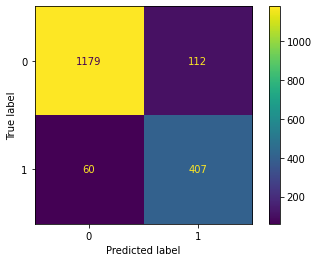

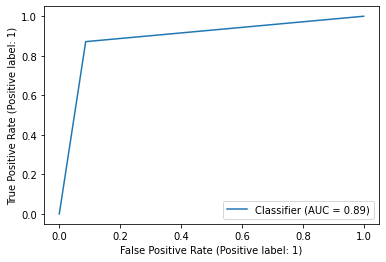

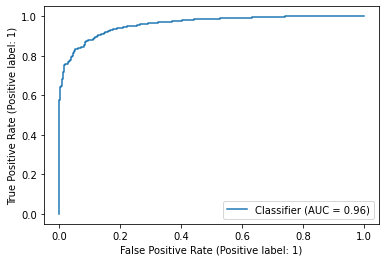

In [164]:
CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        class_weights=[1-weight1, weight1],
        random_state=seed
    )

CatBC.select_features(
                train_pool,
                features_for_select=list(features_train.columns),
                num_features_to_select=9,
                algorithm='RecursiveByShapValues',
                train_final_model=True,
                plot=True)

mentrics_eval(CatBC, features_test, target_test,None,1,1,1,1)

#### Поиск весов при использовании алгоритма апсемплинга SVMSMOTE

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так же архивирую
</div>

In [165]:
#  '''
#  features_train, features_test, target_train, target_test = manual_preproc((df_contract, df_internet, df_personal, df_phone,), 
#                                                                          categorical_features, 
#                                                                          numeric_features,)
#  '''

In [166]:
#  '''
#  svms = SVMSMOTE(random_state=seed)
#  features_train, target_train = svms.fit_resample(features_train, target_train)
#  '''

In [167]:
#  '''
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  '''

In [168]:
#  '''
#  weights = np.linspace(0.0,0.99,200)
#  auc_final = []
#  '''

In [169]:
#  '''
#  for i in weights:
#      CatBC = CatBoostClassifier(
#          early_stopping_rounds=5,
#          class_
#          weights=[1-i, i],
#          random_state=seed
#      )
#  
#      CatBC.fit(
#          train_pool,
#          verbose=False
#      )
#      # make the prediction using the resulting model
#      cat_preds = CatBC.predict(test_pool)
#      auc_final.append(roc_auc_score(target_test, cat_preds))
#  '''

In [170]:
#  '''
#  i = pd.Series(auc_final)
#  best = np.array(auc_final).argmax()
#  print(auc_final[best])
#  
#  x = i.index
#  y = i
#  
#  # plot
#  fig, ax = plt.subplots()
#  
#  ax.plot(x, y)
#  
#  plt.text(best, auc_final[best], auc_final[best], color='g')
#  
#  fig.suptitle('Нахождение весов для модели')
#  plt.ylabel('AUC')
#  plt.xlabel('индекс весов')
#  fig.tight_layout()
#  plt.show()
#  '''

In [171]:
#  '''
#  # если используем алгоритм SVMSMOTE
#  # то вот идеальные весы для него с масимальным возможным AUC
#  weight1 = auc_final[best]
#  
#  # initialize Pool
#  train_pool = Pool(features_train, 
#                    target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
#  test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))
#  
#  CatBC = CatBoostClassifier(
#      early_stopping_rounds=5,
#      class_weights=[1-weight1, weight1],
#      random_state=seed
#  )
#  
#  CatBC.fit(
#      train_pool,
#      verbose=False
#  )
#  
#  # make the prediction using the resulting model
#  mentrics_eval(CatBC, features_test, target_test,1,1,1,1)
#  '''

подбор весов для данного случая снизил метрику

### Optuna Forest optimisation


In [172]:
#  '''
#  def objective(trial):
#  
#      rf_criterion = trial.suggest_categorical("rf_criterion", ['gini', 'entropy', 'log_loss'])
#      rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000, log=True)
#      rf_max_depth = trial.suggest_int("rf_max_depth", 2, 20, log=True)
#      rf_class_weight = trial.suggest_categorical("rf_class_weight", ['balanced', 'balanced_subsample'])
#      
#      classifier_obj = RandomForestClassifier(
#          criterion=rf_criterion, max_depth=rf_max_depth, n_estimators=rf_n_estimators, class_weight=rf_class_weight
#      )
#  
#      score = cross_val_score(classifier_obj, features_train, target_train, n_jobs=-1, scoring='roc_auc', cv=5)
#      accuracy = score.mean()
#      return accuracy
#  
#  
#  if __name__ == "__main__":
#      study = optuna.create_study(direction="maximize")
#      study.optimize(objective, n_trials=100)
#      print(study.best_trial)
#  '''

In [173]:
skf = StratifiedKFold(3, shuffle=True, random_state=seed)
forest = RandomForestClassifier(
    criterion='gini',
    n_estimators=599,
    max_depth=19,
    class_weight='balanced',
    random_state=seed
)

# forest.fit(features_train, target_train)

# mentrics_eval(forest, features_test, target_test,1,1,1,1)

In [174]:
scores = cross_val_score(forest, features_train, target_train, cv=3, scoring='roc_auc', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


In [175]:
basic_models.get('models').get('forest').append(forest)
basic_models.get('metrics').get('forest').append(scores.mean())

In [176]:
#  '''
#  if __name__ == "__main__":
#      clf = RandomForestClassifier(random_state=seed)
#  
#      param_distributions = {
#          "criterion": optuna.distributions.CategoricalDistribution(['gini', 'entropy', 'log_loss']),
#          "n_estimators": optuna.distributions.IntDistribution(100, 1000, step=50),
#          "max_depth": optuna.distributions.IntDistribution(1, 20, step=2),
#          "class_weight": optuna.distributions.CategoricalDistribution(['balanced', 'balanced_subsample']),
#          'min_samples_split': optuna.distributions.IntDistribution(2, 10, step=2),
#          'min_samples_leaf': optuna.distributions.IntDistribution(1, 5),
#      }
#  
#      optuna_search = optuna.integration.OptunaSearchCV(
#          clf, param_distributions, n_trials=100, timeout=600, verbose=2
#      )
#  
#      optuna_search.fit(features_train, target_train)
#  
#      print("Best trial:")
#      trial = optuna_search.study_.best_trial
#  
#      print("  Value: ", trial.value)
#      print("  Params: ")
#      for key, value in trial.params.items():
#          print("    {}: {}".format(key, value))
#  '''

In [177]:
forest = RandomForestClassifier(
    criterion='gini',
    n_estimators=150,
    max_depth=21,
    class_weight='balanced',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=seed
)

# test.fit(features_train, target_train)

# mentrics_eval(test, features_test, target_test,1,1,1,1)

In [178]:
scores = cross_val_score(forest, features_train, target_train, cv=3, scoring='roc_auc', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s finished


In [179]:
basic_models.get('models').get('forest').append(forest)
basic_models.get('metrics').get('forest').append(scores.mean())

In [180]:
#  '''
#  test = RandomForestClassifier(
#      criterion='entropy',
#      n_estimators=650,
#      max_depth=19,
#      class_weight='balanced_subsample',
#      min_samples_split=2,
#      min_samples_leaf=1,
#      random_state=seed
#  )
#  
#  test.fit(features_train, target_train)
#  
#  mentrics_eval(test, features_test, target_test,1,1,1,1)
#  '''

### LightGBM

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- архивирую, так как непосредственно подбор гиперпараметров был сделан для catboost, и боюсь это плохо подойдет к другим
- то есть нужно будет дополнительно настраивать и
</div>

второй вариант бустинг модели

хотел посмотреть различия с CatBoost

в целом как с оптимизацией, так и общие настройки не дали большого прироста и какого то изменения в общей ситуации

In [181]:
%%time
# базовый lightGBM
lgb_train = lgb.Dataset(features_train, target_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'seed': seed
}

gbm = lgb.cv(params,
            lgb_train,
            nfold=3,
            callbacks=[lgb.early_stopping(stopping_rounds=5)],
            return_cvbooster=True)

# y_pred = gbm.get('cvbooster').predict(features_test)

# roc_auc_test = np.array([])
# for i in range(len(y_pred)):
#     predicts = list(map(treshhold, y_pred[i]))
#     roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
# print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster:')
# # берем предикшены лучшей модели
# predicts = y_pred[roc_auc_test.argmax()]
# mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)

[LightGBM] [Info] Number of positive: 935, number of negative: 2581
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 3516, number of used features: 19
[LightGBM] [Info] Number of positive: 935, number of negative: 2581
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 3516, number of used features: 19
[LightGBM] [Info] Number of positive: 934, number of negative: 2582
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

In [182]:
basic_models.get('models').update({'lightGBM': [gbm.get('cvbooster')]})
basic_models.get('metrics').update({'lightGBM': [max(gbm.get('auc-mean'))]})

In [183]:
#  '''
#  # один из вариантов оптимизации гиперпараметров
#  params = {
#      'boosting_type': 'gbdt',
#      'objective': 'binary',
#      'metric': 'auc',
#      'num_leaves': 31,
#      'learning_rate': 0.03,
#      'feature_fraction': 0.9,
#      'bagging_fraction': 0.8,
#      'bagging_freq': 5,
#      'verbose': 0,
#      'force_col_wise': True,
#      'seed': seed,
#      'is_unbalance': True
#  }
#  
#  gbm = lgb.cv(params,
#              lgb_train,
#              nfold=5,
#              callbacks=[lgb.early_stopping(stopping_rounds=5)],
#              return_cvbooster=True)
#  
#  y_pred = gbm.get('cvbooster').predict(features_test)
#  
#  roc_auc_test = np.array([])
#  for i in range(len(y_pred)):
#      predicts = list(map(treshhold, y_pred[i]))
#      roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
#  print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster:')
#  # берем предикшены лучшей модели
#  predicts = y_pred[roc_auc_test.argmax()]
#  mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)
#  '''

#### Optuna for LightGBM

In [184]:
#  '''
#  import optuna.integration.lightgbm as lgb
#  
#  from lightgbm import early_stopping
#  from lightgbm import log_evaluation
#  import sklearn.datasets
#  
#  
#  if __name__ == "__main__":
#      lgb_train = lgb.Dataset(features_train, target_train)
#  
#      params = {
#          "objective": "binary",
#          "metric": "auc",
#          "verbosity": -1,
#          "boosting_type": "gbdt",
#      }
#  
#      tuner = lgb.LightGBMTunerCV(
#          params,
#          lgb_train,
#          folds=StratifiedKFold(5, shuffle=True, random_state=seed),
#          callbacks=[early_stopping(100), log_evaluation(100)],
#          return_cvbooster=True
#      )
#  
#      tuner.run()
#  
#      print("Best score:", tuner.best_score)
#      best_params = tuner.best_params
#      print("Best params:", best_params)
#      print("  Params: ")
#      for key, value in best_params.items():
#          print("    {}: {}".format(key, value))
#  '''

In [185]:
#  '''
#  # light_gbm = tuner.get_best_booster()
#  
#  params = {'objective': 'binary',
#          'metric': 'auc',
#          'verbosity': -1, 
#          'boosting_type': 'gbdt',
#          'feature_pre_filter': False,
#          'lambda_l1': 0.0,
#          'lambda_l2': 0.0,
#          'num_leaves': 47,
#          'feature_fraction': 0.4,
#          'bagging_fraction': 1.0,
#          'bagging_freq': 0,
#          'min_child_samples': 5,
#          'is_unbalance': True,
#          'seed': seed,}
#  
#  gbm = lgb.cv(params,
#              lgb_train,
#              nfold=5,
#              callbacks=[lgb.early_stopping(stopping_rounds=5)],
#              return_cvbooster=True)
#  
#  y_pred = gbm.get('cvbooster').predict(features_test)
#  
#  
#  roc_auc_test = np.array([])
#  for i in range(len(y_pred)):
#      predicts = list(map(treshhold, y_pred[i]))
#      roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
#  print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster: {roc_auc_test.max()}')
#  # берем предикшены лучшей модели
#  predicts = y_pred[roc_auc_test.argmax()]
#  mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)
#  '''

In [186]:
#  '''
#  #### лучшая модель
#  '''

эта часть была написана до того, как попробовал оптимизировать весы для CatBoost и на тот момент это была моделью с лучшей метрикой

In [187]:
#  '''
#  # create dataset for lightgbm
#  lgb_train = lgb.Dataset(features_train, target_train)
#  
#  
#  # specify your configurations as a dict
#  params = {
#      'objective': 'binary',
#      'metric': 'auc',
#      'verbosity': -1,
#      'boosting_type': 'gbdt',
#      'learning_rate': 0.1,
#      'num_leaves': 4,
#      'min_data_in_leaf': 18,
#      'seed': seed,
#      'is_unbalance': True,
#  }
#  
#  gbm = lgb.cv(params,
#              lgb_train,
#              nfold=10,
#              callbacks=[lgb.early_stopping(stopping_rounds=5)],
#              return_cvbooster=True)
#  
#  y_pred = gbm.get('cvbooster').predict(features_test)
#  
#  roc_auc_test = np.array([])
#  for i in range(len(y_pred)):
#      predicts = list(map(treshhold, y_pred[i]))
#      roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
#  print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster: {roc_auc_test.max()}')
#  # берем предикшены лучшей модели
#  predicts = y_pred[roc_auc_test.argmax()]
#  mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)
#      
#  '''

### XGBoost

In [188]:
dtrain = xgb.DMatrix(features_train, label=target_train)
dtest = xgb.DMatrix(features_test)

In [189]:
# вычисление весов
# target_train.loc[target_train == 0].shape[0] / target_train.loc[target_train == 1].shape[0]

In [190]:
param = {
    'eta': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': 2.761768901569187,

}

scores = xgb.cv(param, 
               dtrain, 
               nfold=3, 
               num_boost_round=1000, 
               early_stopping_rounds=5, 
               stratified=True, 
               metrics='auc', 
               seed=seed)

In [191]:
# итерация лучшей метрики
iteration_best = scores['test-auc-mean'].index.max()

In [192]:
bst = xgb.train(param, dtrain, iteration_best)

In [193]:
basic_models.get('models').update({'XGBoost': [bst]})
basic_models.get('metrics').update({'XGBoost': [scores['test-auc-mean'].max()]})

In [194]:
# mentrics_eval(bst, dtest, target_test,None,1,1,1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

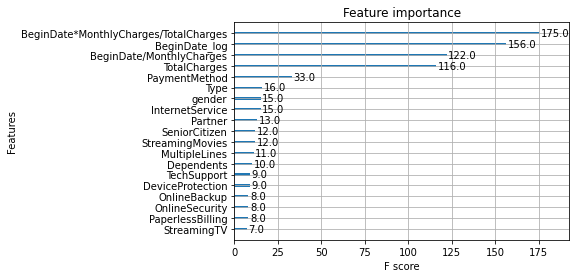

In [195]:
xgb.plot_importance(bst)

In [196]:
##### Оптимизация количества деревьев

In [197]:
#  '''
#  rounds = np.arange(0,100,1)
#  auc_final = []
#  '''

In [198]:
#  '''
#  for i in rounds:
#      param = {
#      # 'max_depth': 3, 
#      # 'eta': 1,
#      # 'objective': 'binary:logistic',
#      'eval_metric': 'auc',
#      # 'sampling_method': 'gradient_based',
#      # 'max_bin': 5000,
#      # 'subsample': ,
#      # 'colsample_bytree':0.75,
#      'objective': 'binary:hinge',
#  
#      }
#      num_round = i
#      bst = xgb.train(param, dtrain, num_round)
#  
#  
#      ypred = bst.predict(dtest)
#      auc_final.append(roc_auc_score(target_test, ypred))
#  '''

In [199]:
#  '''
#  i = pd.Series(auc_final)
#  best = np.array(auc_final).argmax()
#  
#  x = i.index
#  y = i
#  
#  # plot
#  fig, ax = plt.subplots()
#  
#  ax.plot(x, y)
#  
#  plt.text(best, auc_final[best], auc_final[best], color='g')
#  
#  fig.suptitle('Нахождение количества раундов для модели')
#  plt.ylabel('AUC')
#  plt.xlabel('индекс раунда')
#  fig.tight_layout()
#  plt.show()
#  '''

In [200]:
#  '''
#  num_round = best
#  bst = xgb.train(param, dtrain, num_round)
#  
#  mentrics_eval(bst, dtest, target_test,1,1,1,1)
#  '''

## Выбор итоговой модели

In [201]:
# находим лучшую метрику и модель
metric = 0
for k,v in basic_models.get('metrics').items():
    for i in v:
        if i > metric:
            metric = i
            model = k

In [202]:
# находим индекс этой модели
arg_best_model = np.argwhere(np.array(basic_models.get('metrics').get(model)) == metric)[0][0]

In [203]:
# лучшая модель
print(model)
print('AUC:',metric)

CatBoost
AUC: 0.9940986017613562


roc_auc of predictions:       0.8917908034042298
accuracy_test of predictions: 0.9032992036405005


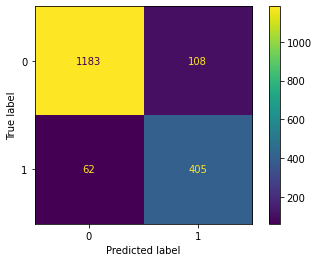

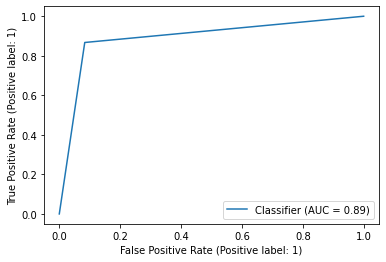

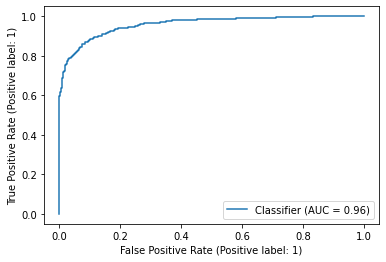

In [204]:
# проходим по тестовым данным лучшей моделью
mentrics_eval(basic_models.get('models').get(model)[arg_best_model], features_test, target_test,None,1,1,1,1)

## Выводы

В исследовании было проведено:
- предобработка данных:
    - использование KNN для заполнения пропущенных данных
    - непрерывные признаки были нормализованы с помощью алгоритма StandartScaler
- обучение базовых моделей
    - DecisionTree
    - Forest
    - LogisticRegressor
- обучение бустинговых моделей:
    - CatBoost
    - LightGMB
    - XGBoost
- так же было проведено:
    - оценка важности признаков на моделях
        - базовых моделях
        - СatBoost
    - были проведены эксперименты с алгоритмами апсемплинга с последующим использованием CatBoost
        - AllKNN
        - SMOTE
        - SVMSMOTE
        - ADASYN
    - поиск весов для CatBoost
    - использование Optuna для оптимизации гиперпараметров в моделях
        - Forest
        - LightGBM
    - создание новых признаков

- лучшая модель: CatBoost
    - AUC: 0.89
    - Accuracy: 0.90

Большинство моделей имеют большое количество ложно положительных предсказаний, что предполагает, что либо нужен иной подход к обучению, либо доработка датасета.
Но при этом ложно отрицательных вариантов минимальное количество по отношению к ложно положительным, в рамках нашей задачи, скорее, можно сказать что это положительный вариант, так как компания не оставит уходящего клиента без предложения в большинстве случаев.

Общая площадь AUC не сильно изменялась среди всех моделей.

Относительно значимые изменения в метриках были:
- с перехода на KNN
- оптимизация весов для целевого признака

<b>Комментарий ревьюера: &#10060; </b>Ты провел действительно большую и интересную работу,есть пара критических замечаний, которые стоит исправить, а именно:
1. Предустановка библиотек
2. В данном случае пропуски по методу ближайших соседей заполнять не стоит
3. Визуализация
4. Корреляция и проверка на мультиколлинеарность
5. Апсемплинг на Roc-AUC не повлияет, это лишнее
6. На тестовой выборке должна проверяться только лучшая модель по результатам кроссвалидации
Молодец, что используешь пайплайны, это позволяет избегать утечки в данных. Возможно тебе стоит посмотреть в сторону создания новых признаков из имеющихся, это позволит улучшить метрики намного лучше, чем перебор моделей

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- по поводу того, что на тестовой выборке должна проверяться только лучшая модель по итогам cv
- в процессе проведения работы заметил, что из за возможного переобучения модели
- хоть по итогам cv модель и выглядит много обещающе, но на тестовой выборке показывает крайне не впечатляющий результат
- поэтому чтобы сразу знать итоговый результат и не хранить ложных надежд
- решил сразу же всех проверять на тестовой выборке
- по идее это же ни на что не влияет?
- кроме как на время выполнения кода
</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- после ревью было проведено:
    - убрал использование KNN в работе
    - архивировал эксперрименты с использованием апсемплинга и комбинированных алгоритмов
        - так как не привносят большого значения в итоговую метрику
    - добавил создание новых признаков
    - добавил визуализацию признаков перед работой
    - добавил проверку vif в начало работы
    - архивировал оптимизации других бустинговых моделей (кроме catboost)
        - оставил первое, базовое обучение
        - так как не привносят большого значения в итоговую метрику
- так же изначально забыл отметить что важными параметрами являются:
    - признаки 
- по итогам доработки возникли следующие значения метрик:
    - оптимизации весов и выбора значимых признаков catboost – 0.8923
    - базовый LightGBM – 0.8969
</div>

<b>Комментарий ревьюера: &#10060; </b>Ты провел действительно большую и интересную работу,есть пара критических замечаний, которые стоит исправить, а именно:
1. Работоспособность кода

<b>Комментарий ревьюера V3: &#10060; </b>Ты провел действительно большую и интересную работу,есть пара критических замечаний, которые стоит исправить, а именно:
1. Работоспособность кода
2. Опечатки
3. Графики
4. тестирование модели

<b>Комментарий ревьюера V4: &#10060; </b>Все хорошо, остался последний момент:
1. Тестирование только итоговой модели

<b>Стоговый комментарий ревьюера V5:
&#9989;</b> Отлично, работа принята, sp=6

# Отчет

Была поставлена задача на обучение модели по данным оператора связи для прогнозирования оттока пользователей.

Перед нами поставили задачу классификации, где целевым признаком является `EndDate`

В процесса анализа данных мы узнали, что 73% пользователь не завершили свой контракт с компанией, что создает дисбаланс классов.

Был странным тот момент, что ни один пользователь не завершил свой контракт в течении 6 лет, что сомнонения по отношению к данным.

В таблице `internet.csv` было большое количество пропущенных данных по отношению к основному файлу `contract.csv` – почти 20%, но в логике наших данных было предположено, что данные пользователи просто не использовали данный функционал, поэтому и были пропущены.

В проекте имеются следующие признаки: 
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'EndDate']

numeric_features = ['TotalCharges', 'MonthlyCharges']

В большинстве категориальных данных, имеется дисбаланс между классами, только у только `gender` и `partner` распределены равномерно.

В непрерывных признаках `TotalCharges`, `MonthlyCharges` выпадающих значений не было. `MonthlyCharges` не обладает нормальным распределение имея два пика: на уровне 25 единиц за месяц и 80 единиц. `TotalCharges` больше похоже на нормальное распределение, с единственным пиком около 1300 единиц.

Так же в используемых данных необходимо было перевести типы данных в нужный формат.

В рамках обучения моделе проект разделен на две части: базовые модели и бустинг модели.

В разделе базовых моделе были проведены эксперименты с обучением таких моделей как: `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression`. 

До того момента, как были добавлены новые признаки в датасет, они были на одном уровне с бустинг моделями.

Для обучения данных моделей был сформирован pipeline с предобработкой категориальный и числовых признаков, после чего они передавались через кросс-валидацию модели.

Гиперпараметры находились через `GridSearchCV`, так же проводился эксперимент с использованием библиотеки `Optuna`, которая так же проводит поиск гиперпараметров, но она не привнеса сильного изменения метрики. Она использовалась для леса и бустинг моделей.

Все обученные модели собирались в общий словарь с их метриками, и в конце проект был проведен поиск лучшей метрики и проверка соответствующей модели на тестовых данных. Результаты после обработки тестовых данных оценивались по 2 метрикам: AUC и Accuracy. Так же выводилась матрица ошибок и ROC кривая.

Каждую базовую модель проверяли три раза:
1. без каких либо дополнительных объектов
2. с использованием стратификации на кросс-валидации
3. эксперимент с оптимизированием признаков

Кросс-валидация со стратификацией лишь немного увеличивала целевую метрику.

Во всех случаях выбранный алгоритм оптимизации признаков только снижал метрику.

Во второй части с бустинг моделями использовались следующие библиотеки:
- CatBoost
- XGBoost
- LightGB

Библиотека для оптимизации гиперпараметров `Optuna` использовалась на LightGB модели.

Были проведены эксперименты с ручной оптимизацией параметров для библиотек CatBoost и XGBoost.

Для CatBoost была проведена оптимизация параметров с помощью внутренних возможностей и поиск весов.

Так же были проведены эксперименты с алгоритмами апсемплинга SMOTE, SVMSMOTE, ADASYN и комбинированный алгоритм SMOTETomek. Данные алгоритмы не сильно влияли на качество обучение моделей.

Основное влияние на метрику оказывают новые добавленные признаки на основе исходных данных.

По итогу проекта лучшей моделью оказалась CatBoost с найденными весами – 0.89 AUC.